# Proyecto: El Desafío de Don Rene

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesores: Matías Rojas - Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*



----

## Reglas

- Fecha de entrega: 13/12/2022 (Sin atrasos)
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia. 
- Pueden usar cualquier material del curso que estimen conveniente.


---

## El desafio de Don Rene


Don Rene, afamado *influencer* y próximo emprendedor de IA, decide que será una buena idea darle un giro a su vida y dedicarse al rubro del asesoramiento de inversionistas en la industria de los videojuegos. 

El futuro empresario plantea que el éxito relativo de una inversión en una desarrolladora de juegos debe ser analizado desde un punto de vista basado en evidencia y no en la intuición. 
Por dicha razón, plantea que para el sería ideal que existiera una máquina que, dada las características de un nuevo videojuego (su género, el estudio que lo desarrolla, su historia, etc...), indique si este será potencialmente una inversión rentable o no.

Rene está convencido que el éxito de una inversión en videojuegos estar relacionada por dos características muy relevantes de estos una vez que salen al mercado:

**1. La potencial evaluación (Positivo, Negativo, etc...) que le den los usuarios que jugarán el juego.**

**2. Las potenciales ventas del juego.**

Si bien la idea puede sonar excelente, Don Rene carece en su totalidad de una formación en Ciencia de los Datos, por lo que decide ir en ayuda de expertos para implementar su idea.

Sin embargo, como fiel discipulo del libre mercado, decide no contratar a un equipo en particular, si no que tener la libertad de elegir entre muchos equipos que compiten entre si para saber cuál contratar. Para esto recurre a una triquiñuela recurrentemente utilizada en data science: Establecer una competencia abierta y contratar a los que cumplan mejor sus requisitos.


Para esto, Don Rene abre una competencia en la plataforma Codalab (plataforma similar a Kaggle) la cuál, espera que se replete de buenas propuestas. Los equipos que mejor evaluaciones obtengan (los primeros 5 de cada tabla) serán contratados y retribuidos con un cupón canjeable con la friolera cantidad de 1 punto bonus para el proyecto en el curso MDS7202.





### Definición Formal del Problema

El objetivo de este proyecto es relativamente sencillo, pero en extremo ambicioso: Tendrán que aplicar todo lo aprendido hasta este momento con el fin de solucionar 2 problemas distintos: 

1. **Clasificación de potenciales evaluaciones con las que los jugadores evaluarán los juegos**. Las posibles clases que deben asignar a cada juego son `('Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive')`. La métrica de evaluación utilizada para medir la clasificación es `f1_weighted`.
2. **Regresión de las potenciales ventas que tendrán los juegos**. La métrica de evaluación utilizada para medir la clasificación es `r_2`.

Para esto, ustedes contarán un dataset que cuenta con diversa información de los juegos de la plataforma Steam (tales como fecha de lanzamiento, logros disponibles, plataforma, desarrollador, distribuidor, tags, etc...) más las etiquetas y valores a predecir.


El objetivo final es que participen en la competencia generada en Codalab. Una competencia de Data Science funciona generalmente de la siguiente manera: 

1. Se plantea un problema que los equipos deben resolver.
2. Se provee de datos de entrenamiento a los equipos para que generen modelos que resuelvan el problema.
3. Se provee de datos de prueba que los equipos deberán predecir con los modelos creados. Una vez predichos, los equipos deben subir los archivos a la plataforma, la cuál los evaluará y publicará en un tablero disponible para todos los participantes.

Por este motivo, se les provee de dos datasets: `train.pickle` y `test.pickle`.

- Por una parte, `train.pickle` está preparado que lo utilizen como conjunto de entrenamiento del modelo; por lo que incluye las etiquetas y valores por predecir. 

- Por otra parte, la evaluación de la competencia será hecha usando `test.pickle`. Es decir, este dataset solo contiene características de los juegos y ustedes deberán predecir tanto las potenciales evaluaciones como las posibles ventas de estos y subir sus resultados.

- Además, tendrán sample subissions, es decir, un ejemplo de como subir las evaluaciones.

Obviamente para subir archivos a la competencia deberán registrarse en Codalab. **Puden participar máximo 5 veces en la competencia** (la idea es evitar que se sobreajusten a los datos que deben predecir)

**IMPORTANTE**: Para la clasificación no usen la cantidad de ventas (target de la regresión) como atributo. Por otro lado, para la regresión no utilicen las evaluaciones como atributo para predecir. Infringir estas reglas implicará en no contar el puntaje de la competencia como tampoco poder participar de los bonus por los tops.




# Proyecto

### Equipo:

- \<Primer integrante\> Daniel Carmona G.
- \<Segundo integrante\> Consuelo Rojas N.

- \<Nombre de usuarios en Codalab\> DanielCG, 

- \<Nombre del Equipo en Codalab\> Kachau-1

### Link de repositorio de GitHub: `<https://github.com/DanielCG19/Evaluaciones-MDS7202>`



## Librerías

In [1]:
!pip install --upgrade pandas
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# NLP
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

!pip install xgboost
!pip install catboost
!pip install lightgbm
from xgboost import XGBClassifier
import lightgbm as lgbm
import catboost as cb
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score


#!pip install pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

#from pandas_profiling import ProfileReport
sns.set_style("darkgrid")

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.



## 1. Introducción

En el siguiente informe se presenta el desarrollo de dos problemas pertinentes al trabajo de la ciencia de datos para resolver una clasificación y una regresión. Los datos utilizados corresponde a un dataframe de videojuegos, los cuales se encuentran disponibles en distintas plataformas. 

En especifico, los datos cuentan con cerca 16 columnas, que incluyen:   

- Nombre del juego, desarrolladores, empresa que lo publicó, categoría a la que pertenece, plataformas en el cual se encuentra disponible, etiquetas en las que aparece y una descripción corta del mismo. Todos estos atributos corresponden al tipo "object", que es más que nada, strings o listas con strings.

- Fecha de lanzamiento, si esta en inglés, edad mínima requerida para jugar, cantidad de logros obtenibles en el juego, tiempo promedio de juego y precio, son otras caracteristicas, correspondientes al tipo int o float.

- Rating y ventas estimadas. Estas son las últimas dos columnas del dataframe y corresponden a las columnas sobres las que se pretende entrenar un clasificador y una regresión para predecir los posibles reviews y las ganancias que tendría este videojuego respectivamente.

Además, el dataset con el que se realizó el proyecto contiene un total de 7881 filas, las cuales no presentan datos faltantes. Este dataset se dividió en 3 para obtener un conjunto de entrenamiento, uno de validación pára la búsqueda de los hiperparametros y uno de testeo, para la selección del clasificador y regresor más apto.

El dataframe de entrenamiento cuenta con un 76.5% del conjunto original, el de testeo es el 15% de los datos y el restante 8.5% corresponde al dataset de validación.

Para la evaluación de los modelos propuestos, se seleccionaron distintas métricas de evaluación. En el caso del clasificador, se utiliza la métrica correpondiente a "f1-weigthed. En especifico, la métrica f1 es una métrica que considera tanto la precisión de la clasificación como el recall. Esta se define como:


$$ f1 = 2 * \frac{precision * recall}{precision + recall} $$

En especifico, la métrica utilizada toma en cuenta la cantidad total de ejemplos de una clase en comparación al resto, de manera de mitigar posibles alteraciones a las métricas por sesgo a una clase en especifica.

Para el caso de la regresión, la métrica a optimizar corresponde a "R2 Score", esta también se conoce como "Coeficiente de determinación". En particular, esta métrica no depende del contexto y en palabras simples, esta métrica explica que tanto mejor es una regresión respecto a una "línea" que divida en el promedio de los datos y se encuentra definida por la siguiente fórmula.

$$ r2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

Los valores que puede adoptar la regresión van desde el -1 al 1, siendo el cero la representación de que la regresión es igual a la división a la media de los datos y el 1, una regresión perfecta- Mientras que los números negativos denuestran que la selección de la mediana, tendría mejores resultados que la regresión hecha.

Los modelos utilizados para resolver los problemas, se basaron en el algoritmo CatBoosting. Este algoritmo es un tipo de GradientBoosting que utiliza árboles de decisión simétricos y sin memoria, de manera de tener una rápida ejecución.

Para realizar el trabajo, se tuvieron que trabajar los datos, de manera de que los algoritmos pudieran ver las posibles relaciones existentes entre los targets y los datos. Para esto se hicieron distintas transformaciones. según el problema. Para el caso de la clasificación, se usaron técnicas de NLP, como "CountVectorizer" y "Stemming" para las caracteristicasdel tipo Obejto, mientras que para las otras, de tipo, númericas, se utilizó un "StandarScaler".

En caso de la regresión, las técnicas de NLP fueron las mismas, sin embargo, para el caso de los atributos numéricos, se uso un "MinMaxScaler".

Finalmente, los modelos probados, fueron satifactorios, dado que ambos superaron el baseline de la competencia y hasta el momento de escrito este informe, se encontraban en 4ta y 3era posición, respectivamente, dentro de la competencia. Sin embargo, el desempeño podría mejorarse con mejores recursos computacionales o una mirada más profunda de los datos.

## 2. Análisis Exploratorio de Datos

En la presente sección se muestra el análisis exploratorio realizado a los datos. Dentro de las estadísticas generales, que se pueden ver en el archivo "Train_Report.html" el cual fue generado mediante `ProfileReport`, se observa que ninguna columna tiene datos faltantes.  Además, entre todos los juegos existentes en la base, no hay ninguno repetido.

Dentro de este reporte, se puede ver que hay algunas columnas que permiten agrupar datos, ya sea developers, en los cuales hay más de 5300 distintos de un set de 7000. Siguiendo esta misma lógica, se tienen las empresas que publican los juegos, teniendo una cantidad menor con solo 3992, siendo cerca de la mitad de los datos distintos entre sí.

Esto se repite con el resto de los datos, como son: categorías, géneros, plataformas y etiquetas, por lo que se puede realizar una codificación de estos datos.

In [2]:
# Nota: Si usan pandas-profiling, usar el modo widget o html para adjuntar sus resultados al notebook de entrega*
df_train = pd.read_pickle("Proyecto/train.pickle")
display(df_train.head())

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018-03-29,1,Bradley Hennessey;Joe Watson,EnderLost Studios,windows,0,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014-06-06,1,bumblebee,Application Systems Heidelberg,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012-08-06,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016-10-04,1,Trion Worlds,Trion Worlds,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018-03-07,1,Amanita Design,Amanita Design,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7881 entries, 0 to 7880
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7881 non-null   object  
 1   release_date       7881 non-null   object  
 2   english            7881 non-null   int64   
 3   developer          7881 non-null   object  
 4   publisher          7881 non-null   object  
 5   platforms          7881 non-null   object  
 6   required_age       7881 non-null   int64   
 7   categories         7881 non-null   object  
 8   genres             7881 non-null   object  
 9   tags               7881 non-null   object  
 10  achievements       7881 non-null   int64   
 11  average_playtime   7881 non-null   int64   
 12  price              7881 non-null   float64 
 13  short_description  7881 non-null   object  
 14  estimated_sells    7881 non-null   int64   
 15  rating             7881 non-null   category
dtypes: cat

Dentro de los datos que se tienen, hay developers, publishers, plataformas, géneros y categorías, estos se pueden repetir en los diferentes datos, al igual que los 'tags', lo que significa que para poder ver relaciones entre estos tipos de datos, se debe hacer un análisis de frecuencia de apareción o algún tipo de encoding para poder ver posibles relaciones.

In [4]:
# profile = ProfileReport(df_train, title="Train Data Report")
# profile.to_file("Train_Report.html")

In [5]:
print('Publisher: ',df_train.publisher.nunique())
print('Developer: ',df_train.developer.nunique())

Publisher:  3992
Developer:  5365


Como los developers son menos que la cantidad total de elementos, se consideró utilizar una codificación en donde a cada developer se le asigno un número, de forma de lograr observar la relación entre los desarrolladores y los juegos, ya que se puede ver la cantidad de juegos que desarrolló cada uno y como estos se relacionan con el rating de un juego y sus ventas. Sin embargo, debido a la gran cantidad de developers existentes en la base de datos, se obtó por realizar una matriz de tokens (unigramas), donde se considera una cierta cantidad de developers más representativos.   

En cuanto a las plataformas, se tiene que existen 3 plataformas distintas `[windows, linux, mac]`, con 5 combinaciones distintas. Debido a que son pocas las plataformas, se utilizó el mismo método que para el atributo anterior, resultanto en una matriz de tres columnas donde se indica si se encuentra o no presente la respectiva plataforma.

In [6]:
df_train2 = df_train.copy()

In [7]:
'''
Se hace el cambio y luego se crea un diccionario, para aplicarle el pre-procesamiento a los datos a los datos de testeo luego.

Además, como las plataformas son solo 3 (5 combinaciones), se puede reproducir este mismo sistema de codificación.
'''
# df_train2["publisher"] = df_train2["publisher"].replace(';',' ', regex=True)
# df_train2["publisher"] = df_train2["publisher"].astype('category')
# df_train2["publisher"] = df_train2["publisher"].cat.codes
# df_train2.head()
publisher_dict =  dict(zip(df_train.publisher.unique(), df_train2.publisher.unique()))

# df_train2["platforms"] = df_train2["platforms"].astype('category')
# df_train2["platforms"] = df_train2["platforms"].cat.codes
# df_train2.head()
plataforms_dict = dict(zip(df_train.platforms.unique(), df_train2.platforms.unique()))

Por otro lado, tenemos que los developers, como las categorias, generos y tags son multivaribles, lo que significa que existe más de un elemento en cada celda, por lo que la creación de una categoria de la misma manera que para los publisher no es la mejor, dado que al ser parecido al "texto libre" es posible que no se repitan los elementos. 

Por ello, la codificación tendría que ser a través de alguna clase de emmbedings con la ayuda de NLP.

In [8]:
# df_train_tags = df_train['tags'].str.get_dummies(sep = ';')
# tags = df_train_tags.columns
# df_train_tags = df_train_tags.to_numpy()

### Estimación de ventas

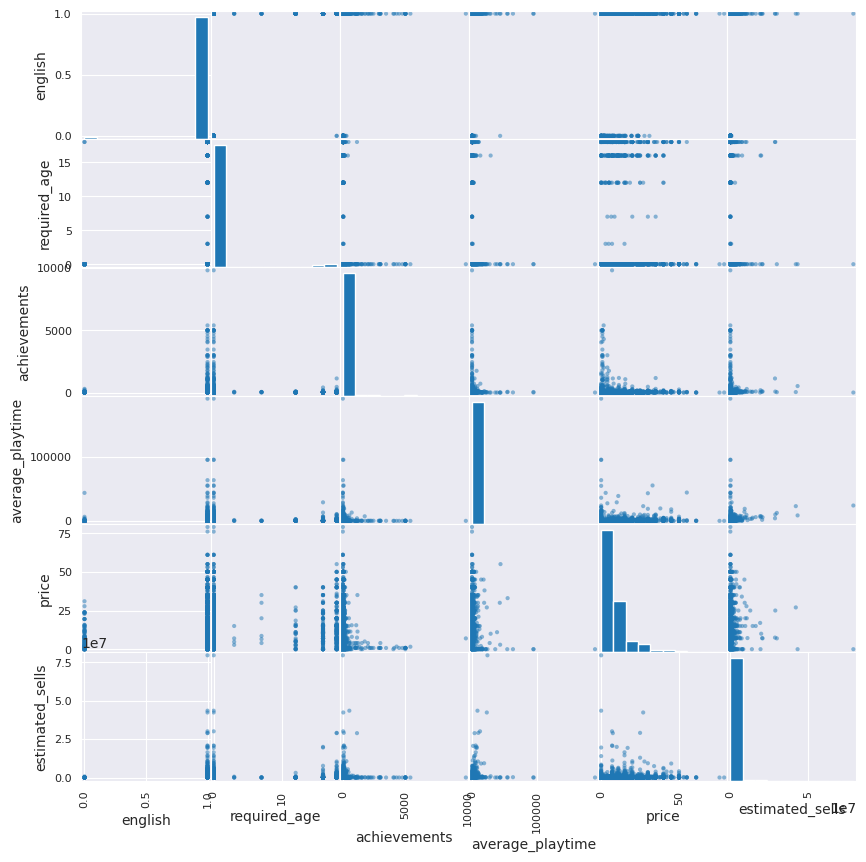

In [9]:
pd.plotting.scatter_matrix(df_train2, figsize=(10, 10))
plt.show()

Dentro de los gráficos de disperción presentados arriba, se puede observar que no hay una correlación clara entre las variables, por lo que se puede concluir que no hay una relación lineal entre ellas. Esto significa que es necesario buscar relaciones no lineales para ver si existe alguna configuración que permita predicir las ventas o hacer la clasificación de un juego.

/tmp/ipykernel_333/864457556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train2.corr('kendall')[['estimated_sells']].sort_values(by='estimated_sells', ascending=False)


Text(0.5, 1.0, 'Features Correlating with estimated sells by Kendall method')

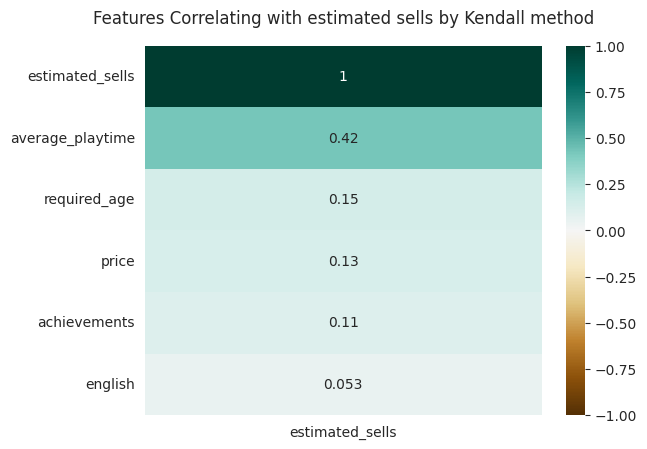

In [10]:
corr = df_train2.corr('kendall')[['estimated_sells']].sort_values(by='estimated_sells', ascending=False)

#plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with estimated sells by Kendall method', fontdict={'fontsize':12}, pad=16)

Notamos que utilizando correlación de Kendall, se puede ver que hay una correlación mediana entre el tiempo de juego y las ventas, lo que significa que hay una relación no lineal entre ellas. Esto significa que al momento de predecir las ventas de un juego, la variable perteneciente al tiempo es de importancia.

/tmp/ipykernel_333/3093557071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_train2.corr('spearman')[['estimated_sells']].sort_values(by='estimated_sells', ascending=False)


Text(0.5, 1.0, 'Features Correlating with estimated sells by Spearman method')

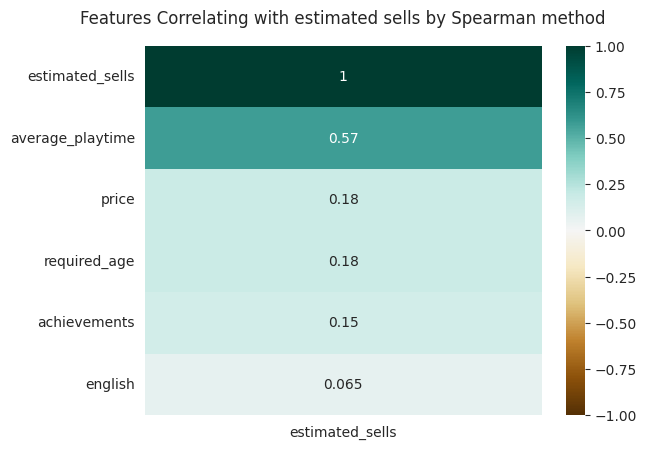

In [11]:
corr2 = df_train2.corr('spearman')[['estimated_sells']].sort_values(by='estimated_sells', ascending=False)

#plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(corr2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with estimated sells by Spearman method', fontdict={'fontsize':12}, pad=16)

Con estos graficos se puede concluir que las relaciones estadisticamente más relevante con las ventas estimadas de un juego depende del tiempo de juego de este más que del precio, lo que es poco intuitivo hasta cierto punto, dado que se tiende a pensar que a menor valor de un juego más altas serían sus ventas.

In [12]:
for col in df_train.select_dtypes(include='object'):
    if df_train[col].nunique() <= 1000:
        display(df_train.groupby(col)[['estimated_sells', 'average_playtime', 'price', 'achievements','english']].mean())


,estimated_sells,average_playtime,price,achievements,english
platforms,,,,,
mac,21567.000000,0.000000,15.490000,68.000000,1.000000
windows,163763.999782,366.683373,8.967176,42.963609,0.978209
windows;linux,290503.904192,1015.401198,7.098323,35.113772,0.994012
windows;mac,134341.185152,497.974061,7.134678,28.962433,0.993739
windows;mac;linux,353595.665005,524.965603,8.035673,52.219342,0.998006


,estimated_sells,average_playtime,price,achievements,english
genres,,,,,
Action,4.676721e+05,414.394209,13.317884,27.861915,1.0
Action;Adventure,7.305278e+05,499.226415,15.650236,26.301887,1.0
Action;Adventure;Casual,1.927271e+05,227.777778,7.967778,13.666667,1.0
Action;Adventure;Casual;Free to Play;Indie,3.490900e+06,816.000000,0.000000,13.750000,1.0
Action;Adventure;Casual;Free to Play;Indie;Massively Multiplayer,2.993040e+05,93.000000,0.000000,0.000000,1.0
...,...,...,...,...,...
Violent;Gore;Indie;RPG,3.902600e+04,0.000000,6.990000,0.000000,1.0
Violent;RPG,8.252300e+04,127.333333,28.323333,36.333333,1.0
Violent;RPG;Strategy,1.952200e+04,9.000000,11.390000,16.000000,1.0


### Clasificación de juegos

In [13]:
px.histogram(
    df_train, 
    x="rating", 
    title="Análisis de la variable rating", 
    marginal="box",
    color = 'rating'
)

In [14]:
fig = px.treemap(df_train, path=[px.Constant("all"),'rating','platforms'],
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Se puede ver que, en general, a mejor rating mayor es la venta. Sin embargo, los valores no estan normalizados, por lo que hay que tener cuidado al momento de la utilización de modelos clasificadores. Porque como hay más juegos de rating positivo o mayoritariamente positivo, en vez de negativo, el sistema va a generar un sesgo a estos ratings.

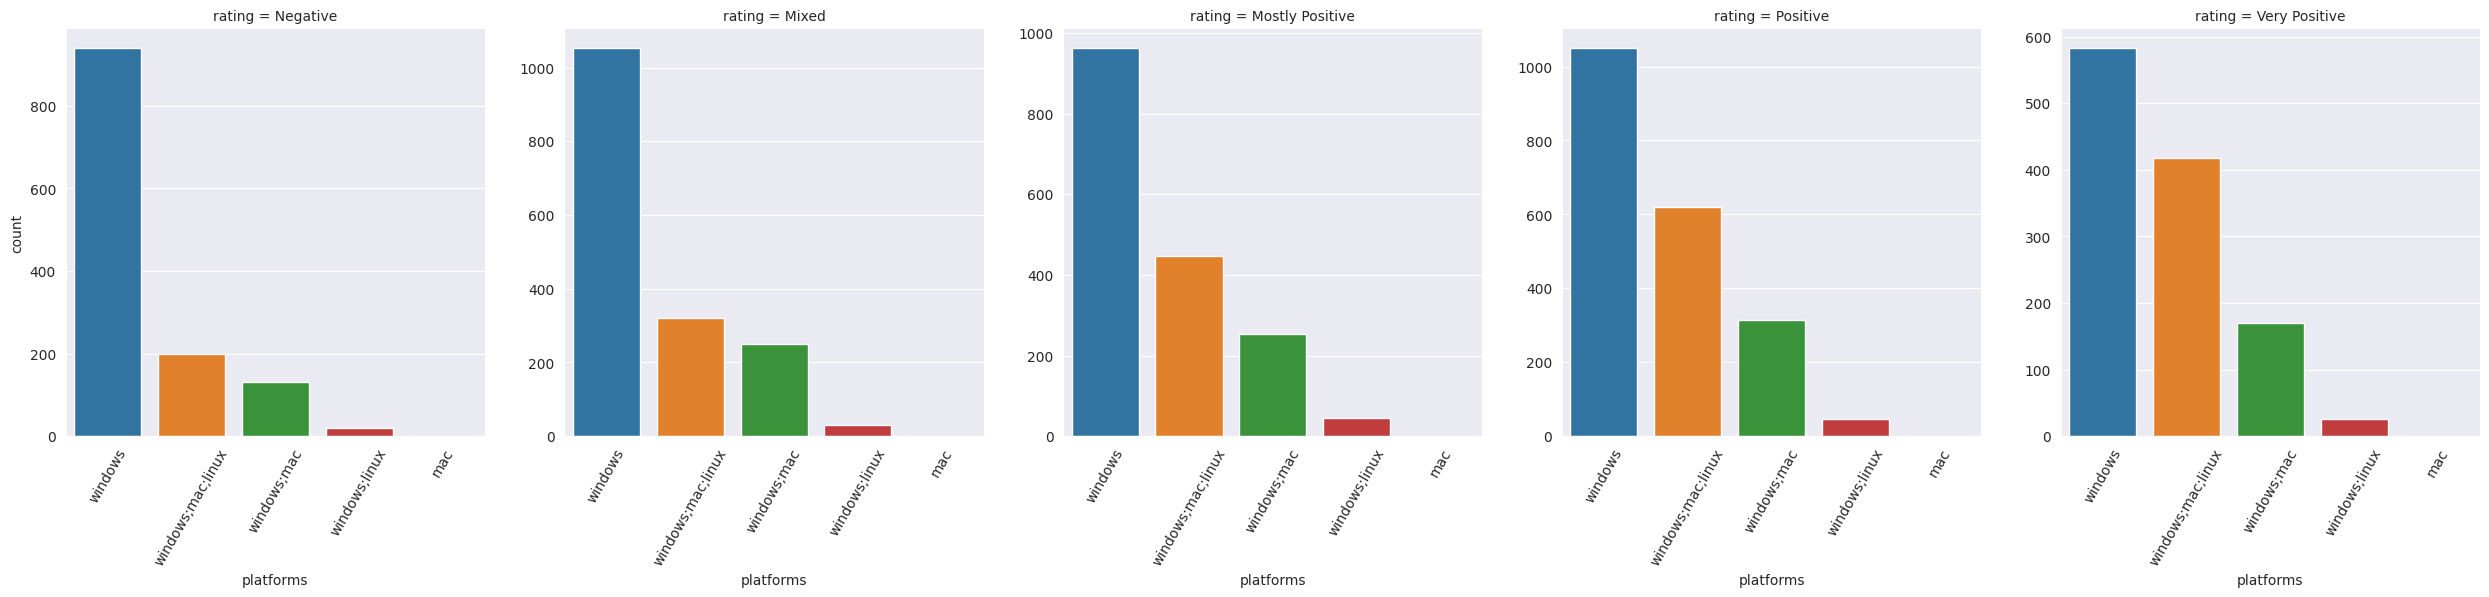

In [15]:
for col in df_train.select_dtypes(include='object'):
    if df_train[col].nunique() <= 500:
        g = sns.catplot(x = col, kind='count', col = 'rating', data=df_train, sharey=False)
        g.set_xticklabels(rotation=60)

---

## 3. Preparación de Datos

Para preparar nuestros datos, primero eliminamos datos que contienen valores faltantes o NaN, y datos duplicados. Luego, se eliminan los espacios de todas las columnas que contienen texto, como developers, tags, etc. De esta manera cada estudio o tag queda en una misma palabra, como es el caso del tag: `Free To Play`, el cual, quedaría sepadado luego de crear la matriz de tokens. Luego, se cambian los separadores `;` por un espacio de forma que distintos tags queden separados entre sí.

Por último, se cambia la fecha de lanzamiento de cada juego, dejando solamente el año en que este fue lanzado.

In [16]:
## Código
df_train = df_train2.dropna()
df_train = df_train.drop_duplicates()
#df_desc = df_train['short_description']

df_train["genres"] = df_train["genres"].replace(' ','', regex=True)
df_train["developer"] = df_train["developer"].replace(' ','', regex=True)
df_train["tags"] = df_train["tags"].replace(' ','', regex=True)
df_train["categories"] = df_train["categories"].replace(' ','', regex=True)
df_train["publisher"] = df_train["publisher"].replace(' ','', regex=True)
df_train = df_train.replace(';', ' ', regex=True)
df_train = df_train.replace('-', '', regex=True)

#df_train['short_description'] = df_desc
df_train['release_date'] = pd.DatetimeIndex(df_train['release_date']).year

In [17]:
def prepare_df(df_test):
    ''''
    funcion que recibe un datafrme sin procesar, y retorna un dataframe listo para ser utilizado 
    por los modelos de clasificación y regresión.
    '''
    df_test = df_test.dropna()
    df_test = df_test.drop_duplicates()
    df_test["genres"] = df_test["genres"].replace(' ','', regex=True)
    df_test["developer"] = df_test["developer"].replace(' ','', regex=True)
    df_test["tags"] = df_test["tags"].replace(' ','', regex=True)
    df_test["categories"] = df_test["categories"].replace(' ','', regex=True)
    df_test["publisher"] = df_test["publisher"].replace(' ','', regex=True)
    df_test = df_test.replace(';', ' ', regex=True)
    df_test = df_test.replace('-', '', regex=True)
    df_test['release_date'] = pd.DatetimeIndex(df_test['release_date']).year
    display(df_test)
    return df_test

In [18]:
df_train

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018,1,BradleyHennessey JoeWatson,EnderLostStudios,windows,0,Singleplayer SteamAchievements,Adventure Casual FreetoPlay Indie Simulation,FreetoPlay Adventure Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014,1,bumblebee,ApplicationSystemsHeidelberg,windows mac linux,0,Singleplayer SteamAchievements SteamTradingCar...,Casual Indie Simulation Strategy,TurnBased Indie Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012,1,DaedalicEntertainment,DaedalicEntertainment,windows mac linux,0,Singleplayer SteamAchievements SteamTradingCar...,Adventure Indie,Adventure Point&Click Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016,1,TrionWorlds,TrionWorlds,windows,0,Multiplayer OnlineMultiPlayer SteamAchievement...,FreetoPlay Strategy,FreetoPlay Multiplayer Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018,1,AmanitaDesign,AmanitaDesign,windows mac,0,Singleplayer SteamAchievements SteamTradingCar...,Adventure Casual Indie,Adventure Indie Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,KOEWOTAYORINI / 声之寄托,2018,0,あみそ組,Pujia8Studio GameraGame,windows,0,Singleplayer SteamAchievements SteamCloud,Adventure FreetoPlay Indie RPG,FreetoPlay Adventure Anime,20,65,0.00,“喂喂，求求你啦！救救我！” ——你接到这样一个电话 发出这样的求救，给你打电话的人，是一名...,24130,Positive
7877,Montaro,2016,1,JCKSLAP,MBDL,windows,0,Singleplayer SteamAchievements SteamTradingCards,Casual Indie,Memes Cute Casual,15,174,0.79,Montaro is a DOGE.,550368,Very Positive
7878,Moe Jigsaw,2018,1,ARESInc.,ARESInc.,windows,0,Singleplayer SteamAchievements SteamTradingCar...,Casual Indie,Casual Nudity Indie,72,0,2.89,&quot Moe Jigsaw&quot is the definitive versi...,10906,Mostly Positive
7879,Drunkn Bar Fight,2016,1,TheMunky,TheMunky,windows,0,Singleplayer Multiplayer OnlineMultiPlayer Loc...,Action Indie EarlyAccess,EarlyAccess Action Indie,0,0,10.99,"VR PARTY GAMEDrunkn Bar Fight is a simple, imm...",18876,Mostly Positive


Después, separamos el conjunto de datos en conjunto de entrenamiento y prueba con proporciones 85% y 15% respectivamente. El conjunto de validación se utilizó para encontrar los hiperparámetros del modelo que obtuvo mejores resultados en primera instacia, es decir, el clasificador CatBoost. Sin embargo, una vez encontrados estos valores, solo se utilizó la partición de conjunto de entrenamiento y prueba, con el objetivo de contar con una mayor cantidad de datos.

Para las clases del clasificador, se utilizó la librería LabelEncoder de scikit-learn, para codificar los rating `[Very Positive,Negative,Mixed,Positive,Mostly Positive]` con valores numéricos de 0 a 4. Una vez realizadas las predicciones del conjunto de prueba, se aplica una transformación inversa con el LabelEncoder entrenado, a los resultados obtenidos, para que estos cumplan con el formato solicitado en la competencia. 

In [19]:
## Código
y =  df_train[['rating', 'estimated_sells']]
X = df_train.drop(['rating', 'estimated_sells'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

y_train_clas = y_train['rating'] #df_train['rating']
y_train_reg = y_train['estimated_sells'] #df_train['estimated_sells']

# y_val_clas = y_val['rating'] #df_train['rating']
# y_val_reg = y_val['estimated_sells'] #df_train['estimated_sells']

y_test_clas = y_test['rating'] #df_train['rating']
y_test_reg = y_test['estimated_sells'] #df_train['estimated_sells']


# aplicamos label encoder a los reviews
le = preprocessing.LabelEncoder()
le.fit(y_train_clas)
y_train_clas = pd.DataFrame(le.transform(y_train_clas))
y_test_clas = pd.DataFrame(le.transform(y_test_clas))
# y_val_clas = pd.DataFrame(le.transform(y_val_clas))

# mostrar resultados
display(X_train.head())
display(y_train_clas.head())


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description
4848,Easy™ eSports,2015,1,EasyAntiCheatLtd,EasyAntiCheatLtd,windows,0,Multiplayer CrossPlatformMultiplayer,Utilities,Utilities FreetoPlay,0,128,0.00,Keeping games fun! Play fair with the leading ...
6836,Sid Meier's Civilization® III Complete,2006,1,FiraxisGames,2K,windows,0,Singleplayer Multiplayer Includesleveleditor,Strategy,Strategy TurnBasedStrategy TurnBased,0,1166,2.99,"Sid Meier's Civilization III: Complete, the la..."
6341,JUMP FORCE,2019,1,"SpikeChunsoftCo.,Ltd.",BANDAINAMCOEntertainment,windows,0,Singleplayer OnlineMultiPlayer LocalMultiPlaye...,Action,Fighting Anime Action,50,338,49.99,Create your own avatar to fight alongside the ...
2164,Fidget Spinner,2017,1,AntonioRenna,AntonioRenna,windows mac linux,0,Singleplayer SteamAchievements,Casual Indie Simulation,Memes SexualContent Illuminati,1,28,0.79,"Fidget Spinner, the game you were all waiting ..."
7327,Tobe's Vertical Adventure,2011,1,SecretBase,SecretBase,windows,0,Singleplayer Shared/SplitScreen SteamAchieveme...,Action Adventure Indie,Indie Action Adventure,13,17,0.79,Two unique characters and a total of 4 islands...


,0
0,0
1,3
2,2
3,1
4,2


Antes de continuar con el procesamiento de datos, realizamos unas visualizaciones con el conjunto de prueba. Donde podemos ver que para la variable de ventas estimadas, en general se obtinen distribuciones similares, pero con datos aislados que se escapan de estas distribuciones, por lo que se podrían considerar como outliers.

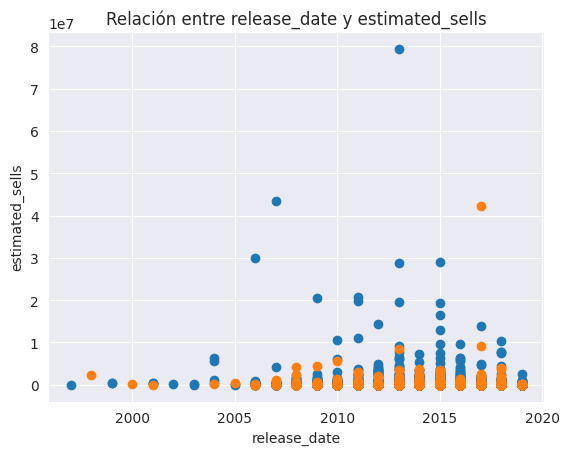

In [20]:
plt.scatter(X_train['release_date'], y_train_reg, label='train')
plt.scatter(X_test['release_date'], y_test_reg, label='test')
plt.xlabel('release_date')
plt.ylabel('estimated_sells')
plt.title('Relación entre release_date y estimated_sells')
plt.show()

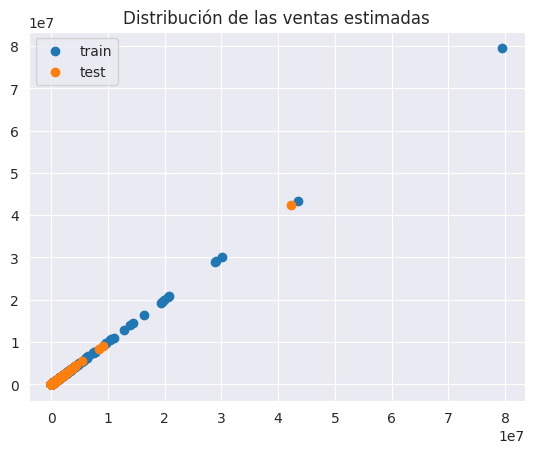

In [21]:
plt.scatter(y_train_reg, y_train_reg, label='train')
plt.scatter(y_test_reg, y_test_reg, label='test')
plt.title('Distribución de las ventas estimadas')
plt.legend()
plt.show()

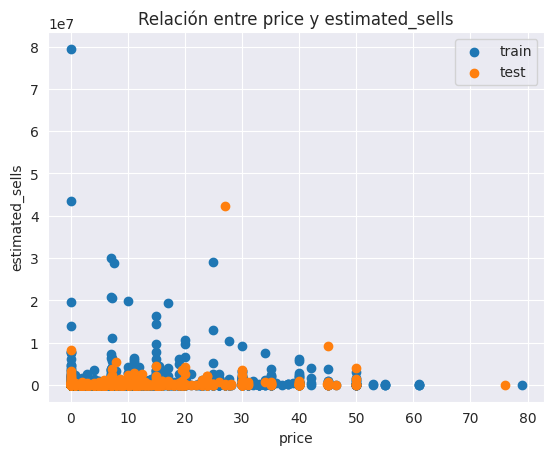

In [22]:
plt.scatter(X_train['price'], y_train_reg, label='train')
plt.scatter(X_test['price'], y_test_reg, label='test')
plt.xlabel('price')
plt.ylabel('estimated_sells')
plt.title('Relación entre price y estimated_sells')
plt.legend()
plt.show()

Definimos la clase StemmerTokenizer, para generar una serie de tokens a partir de los campos de texto presentes en el dataset, eliminando las palabras vaías o stopwords en inglés. Luego, mediante la función CountVectorizer se genera una matriz que cuenta las ocurriencias de estos tokens en el campo de texto.

In [23]:
# Definimos algunas stopword que queremos que sean eliminadas
stop_words = stopwords.words('english')
tags = X_train['tags']#.replace(';', ' ', regex=True)

# Definimos un tokenizador con Stemming
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

cnt_vectorizer = CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,3), max_features=20, binary='true')
bow_tags = cnt_vectorizer.fit_transform(tags)

In [24]:
# df_tags = pd.DataFrame(bow_tags.toarray(), columns=cnt_vectorizer.get_feature_names_out())
# df_tags

In [25]:
X_train.columns

Index(['name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'tags',
       'achievements', 'average_playtime', 'price', 'short_description'],
      dtype='object')

Luego, preparamos un `ColumnTransformer` donde, se tokenizan todas las columnas de texto, es decir los atributos `[developer, publisher, platforms, categories, genres, tags]`, donde para cada uno se seleciona una una cantidad distinta de `n-gramas` y distinto máximo de atributos. Además, mediante el ColumnTransformer, se aplica un StandarScaler a las variables numéricas ` [release_date, achievements, average_playtime]`.

Una vex definido, se coloca dentro de un `Pipeline`, donde luego se seleccionan las mejores caracteristicas y por ultimo, se encuentra el modelo que será entrenado o utilizado para realizar predicciones.

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
# ct = ColumnTransformer(
#     [('CVec_tags', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=150, binary='true'), 'tags'),
#     ('CVec_dev', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=50, binary='true'), 'developer'),
#     ('CVec_dsc', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=50, binary='true'), 'short_description'),
#     ('CVec_gnr', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,3), max_features=100, binary='true'), 'genres'),
#     ('CVec_cat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=50, binary='true'), 'categories'),
#     ('StandarScaler', StandardScaler(), ['release_date','publisher','achievements','average_playtime','price','required_age']),
#     ("MinMax", MinMaxScaler(), ['platforms'])
#        ]
#     )

ct = ColumnTransformer(
    [('CVec_tags', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=150, binary='true'), 'tags'),
    ('CVec_dev', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=50, binary='true'), 'developer'),
    ('CVec_dsc', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=50, binary='true'), 'short_description'),
    ('CVec_gnr', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,3), max_features=100, binary='true'), 'genres'),
    ('CVec_cat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=50, binary='true'), 'categories'),
    ('CVec_plat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=15, binary='true'), 'platforms'),
    ('CVec_pub', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'publisher'),
    ('StandarScaler', StandardScaler(), ['release_date','achievements','average_playtime'])#,'platforms'])#,
    #("MinMax", MinMaxScaler(), ['platforms'])
       ]
    )

steps = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=90)),
         ('Clf', XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          tree_method='auto',
                          grow_policy='depthwise'))]

stepsCat = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         #("FeatureSelector2",SelectKBest(f_classif, k="all")),
        #  ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Clf', cb.CatBoostClassifier(depth=6, #10, 
                                       iterations=1000, 
                                       learning_rate=0.1,
                                       l2_leaf_reg=5, 
                                       eval_metric='TotalF1',
                                       od_type = "Iter",
                                       od_wait = 50,
                                       #task_type="GPU"
                                       task_type="CPU"))]

stepsLgbm = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Clf', lgbm.LGBMClassifier())]

stepsOvsR = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=90)),
         ('Clf', OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.001, penalty='l2', class_weight="balanced"), n_jobs=-1))]
         #OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1', class_weight="balanced"), n_jobs=-1)

stepsBaseline = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Clf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1))]

pipe = Pipeline(steps)
pipecat = Pipeline(stepsCat)
pipelgbm = Pipeline(stepsLgbm)
pipeOvsR = Pipeline(stepsOvsR)
pipeBaseline = Pipeline(stepsBaseline)

---

## 4. Baseline

Adjuntamos las transformaciones anteriores en un solo `Pipeline` y agregamos al final un clasificador sencillo `ClasificadorX` 


### Clasificador

In [29]:
pipe.fit(X_train, y_train_clas.values.ravel())
y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

pipecat.fit(X_train, y_train_clas.values.ravel())
y_predCat_train = pipecat.predict(X_train)
y_predCat = pipecat.predict(X_test)

# pipelgbm.fit(X_train, y_train_clas.values.ravel())
# y_predLgbm_train = pipelgbm.predict(X_train)
# y_predLgbm = pipelgbm.predict(X_test)

# pipeOvsR.fit(X_train, y_train_clas.values.ravel())
# y_predOvsR_train = pipeOvsR.predict(X_train)
# y_predOvsR = pipeOvsR.predict(X_test)

pipeBaseline.fit(X_train, y_train_clas.values.ravel())
y_predBaseline_train = pipeBaseline.predict(X_train)
y_predBaseline = pipeBaseline.predict(X_test)

9:	learn: 0.2566737	total: 397ms	remaining: 39.3s
10:	learn: 0.2570703	total: 434ms	remaining: 39s
11:	learn: 0.2652782	total: 468ms	remaining: 38.5s
12:	learn: 0.2710972	total: 502ms	remaining: 38.1s
13:	learn: 0.2728851	total: 536ms	remaining: 37.7s
14:	learn: 0.2754766	total: 570ms	remaining: 37.5s
15:	learn: 0.2782336	total: 603ms	remaining: 37.1s
16:	learn: 0.2779280	total: 634ms	remaining: 36.7s
17:	learn: 0.2808576	total: 667ms	remaining: 36.4s
18:	learn: 0.2845193	total: 700ms	remaining: 36.2s
19:	learn: 0.2854771	total: 734ms	remaining: 36s
20:	learn: 0.2893331	total: 772ms	remaining: 36s
21:	learn: 0.2930631	total: 806ms	remaining: 35.8s
22:	learn: 0.2950807	total: 839ms	remaining: 35.7s
23:	learn: 0.2966601	total: 873ms	remaining: 35.5s
24:	learn: 0.3029006	total: 909ms	remaining: 35.5s
25:	learn: 0.3068503	total: 943ms	remaining: 35.3s
26:	learn: 0.3076697	total: 982ms	remaining: 35.4s
27:	learn: 0.3119441	total: 1.01s	remaining: 35.2s
28:	learn: 0.3100879	total: 1.05s	rema

In [30]:
print(f"XGB:\n {classification_report(y_test_clas, y_pred)}")
print(f"XGB train:\n {classification_report(y_train_clas, y_pred_train)}")
print(f"CAT:\n {classification_report(y_test_clas, y_predCat)}")
print(f"CAT train:\n {classification_report(y_train_clas, y_predCat_train)}")
# print(f"LGBM:\n {classification_report(y_test_clas, y_predLgbm)}")
# print(f"LGBM train:\n {classification_report(y_train_clas, y_predLgbm_train)}")
# print(f"OvsR:\n {classification_report(y_test_clas, y_predOvsR)}")
# print(f"OvsR train:\n {classification_report(y_train_clas, y_predOvsR_train)}")
print(f"Baseline train:\n {classification_report(y_train_clas, y_predBaseline_train)}")
print(f"Baseline test:\n {classification_report(y_test_clas, y_predBaseline)}")

XGB:
               precision    recall  f1-score   support

           0       0.31      0.27      0.29       250
           1       0.23      0.22      0.22       253
           2       0.44      0.45      0.44       199
           3       0.33      0.44      0.37       295
           4       0.47      0.32      0.38       186

    accuracy                           0.34      1183
   macro avg       0.35      0.34      0.34      1183
weighted avg       0.34      0.34      0.34      1183

XGB train:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1406
           1       0.87      0.79      0.83      1454
           2       0.81      0.87      0.84      1091
           3       0.77      0.89      0.83      1736
           4       0.90      0.82      0.86      1011

    accuracy                           0.84      6698
   macro avg       0.85      0.84      0.84      6698
weighted avg       0.84      0.84      0.84      6698

CAT:

De todos los modelos, se logra observar que el modelo que obtuvo un mejor puntaje con respecto a la métrica `f1-weighted`, corresponde al modelo CatBoost, razón por la cual se utilizó este modelo para participar en la competencia.

### Regresión

Para la regresión, se probaron varios modelos, entre los cuales se encuentra CatBoost, GradientBoost, ElasticNet, Lasso, Ridge, SVR. De estos modelos, los que obtuvieron mejores resultados fueron los modelos de regresión CatBoost y GradientBoost.    

Si bien los resultados obtenidos por el modelo GradientBoost son mejores con respecto a la métrica r2 que para el modelo CatBoost, el valor obtenido para la esta ultima es superior en el conjunto de prueba de la competencia (49%) debido a que por los hiperparámetros utilizados, se obtiene un modelo menos sobreajustado a los datos de entrenamiento. Para lograr esto ultimo, se utilizó una profundidad no muy grande, con una tasa de aprendizaje no muy pequeña, además, se incluyó la opción ''od_wait'' la cual espera una cierta cantidad de épocas antes de actualizar los pesos del modelo.   

In [31]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from catboost import CatBoostRegressor

ct_reg1 = ColumnTransformer(
    [('CVec_tags', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=150, binary='true'), 'tags'),
    ('CVec_dev', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=15, binary='true'), 'developer'),
    ('CVec_plat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'platforms'),
    ('CVec_pub', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'publisher'),
    ('StandarScaler', StandardScaler(), ['release_date','average_playtime','price'])
       ]
    )

cat_pipe = Pipeline([("Preprocesamiento", ct_reg1),
              ("FeatureSelector",SelectPercentile(f_regression, percentile=80)),
              ('regresor', CatBoostRegressor(verbose=10, 
                                        n_estimators=1000, 
                                        learning_rate=0.3, 
                                        depth=10, 
                                        l2_leaf_reg=9, 
                                        od_type = "Iter",
                                        od_wait = 100)) #GradientBoostingRegressor(random_state=0)
              ])

cat_pipe.fit(X_train,y_train_reg)
y_predict_train = cat_pipe.predict(X_train)
#y_predict_val = cat_pipe.predict(X_val)
y_predict_test = cat_pipe.predict(X_test)
r2_1 = r2_score(y_train_reg, y_predict_train)
#rmse2 = r2_score(y_val_reg, y_predict_val)
r2_3 = r2_score(y_test_reg, y_predict_test)

#print(rmse1, rmse2, rmse3)
print(r2_1, r2_3)

0:	learn: 1475166.3206141	total: 23.1ms	remaining: 23s
10:	learn: 1044565.5037575	total: 247ms	remaining: 22.2s
20:	learn: 793070.5814096	total: 462ms	remaining: 21.5s
30:	learn: 628380.7922454	total: 670ms	remaining: 21s
40:	learn: 521341.9319950	total: 891ms	remaining: 20.8s
50:	learn: 451674.4595661	total: 1.1s	remaining: 20.6s
60:	learn: 394278.9536922	total: 1.32s	remaining: 20.4s
70:	learn: 355157.2955406	total: 1.54s	remaining: 20.1s
80:	learn: 326815.7576313	total: 1.75s	remaining: 19.8s
90:	learn: 307839.0839473	total: 1.97s	remaining: 19.7s
100:	learn: 285014.6793834	total: 2.19s	remaining: 19.5s
110:	learn: 273225.0838379	total: 2.4s	remaining: 19.2s
120:	learn: 255484.9094091	total: 2.61s	remaining: 19s
130:	learn: 242404.7173923	total: 2.82s	remaining: 18.7s
140:	learn: 229365.5197142	total: 3.05s	remaining: 18.6s
150:	learn: 222259.3859984	total: 3.26s	remaining: 18.3s
160:	learn: 210680.9641390	total: 3.48s	remaining: 18.1s
170:	learn: 201088.7918246	total: 3.69s	remaini

In [32]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from catboost import CatBoostRegressor

ct_reg2 = ColumnTransformer(
    [('CVec_plat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'platforms'),
    ('CVec_pub', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'publisher'),
    ('StandarScaler', MinMaxScaler(), ['release_date','achievements','average_playtime','price'])#,'platforms'])
       ]
    )

grad_pipe = Pipeline([("Preprocesamiento", ct_reg2),
              ("FeatureSelector",SelectPercentile(f_regression, percentile=90)),
              ('regresor', GradientBoostingRegressor(random_state=0))
              ])
            

grad_pipe.fit(X_train,y_train_reg)
y_predict_train = grad_pipe.predict(X_train)
#y_predict_val = grad_pipe.predict(X_val)
y_predict_test = grad_pipe.predict(X_test)
r2_1 = r2_score(y_train_reg, y_predict_train)
#rmse2 = r2_score(y_val_reg, y_predict_val)
r2_2 = r2_score(y_test_reg, y_predict_test)

#print(rmse1, rmse2, rmse3)
print(r2_1, r2_2)

0.8856466257441025 0.7554411252896418


Como podemos observar, en ambos modelos de regresión, no fueron utilizados los atributos de restricción de edad, el cual presentaba un bajo porcentaje de correlación en los graficos obtenidos en la exploración de datos. Además, a partir de la matriz de correlación obtenida en el archivo `Train_report.html`, se logra observar que el atributo de cantidad de logros del juego, esta altamente correlacionado con la cantidad de ventas, y estos es facil de observar en las regresiones anteriores, ya que quitando este atributo en el entrenamiento, reduce bastante el r2_score obtenido en el conjunto de prueba.

In [ ]:
### Regresión
'''
A continuacion se realizan pruebas con distintos modelos de regresion, para luego buscar los hiperparametros 
que mejor se ajusten a los datos, para el modelo que obtenga el mayor porcentaje r2.
'''

from sklearn.svm import SVR
from sklearn.metrics import r2_score

ct_reg3 = ColumnTransformer(
    [#('CVec_tags', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=150, binary='true'), 'tags'),
    #('CVec_dev', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=15, binary='true'), 'developer'),
    #('CVec_dsc', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=5, binary='true'), 'short_description'),
    #('CVec_gnr', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,2), max_features=50, binary='true'), 'genres'),
    #('CVec_cat', CountVectorizer(tokenizer = StemmerTokenizer(), ngram_range=(1,1), max_features=30, binary='true'), 'categories'),
    ('StandarScaler', MinMaxScaler(), ['release_date','achievements','average_playtime','price','platforms'])
    #('StandarScaler', StandardScaler(), ['release_date','achievements','average_playtime','price','platforms'])#,
    #("MinMax", MinMaxScaler(), ['platforms'])
       ]
    )

#regresores
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

#svrs = [svr_rbf, svr_lin, svr_poly]


stepsReg1 = [("Preprocesamiento", ct_reg3),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Reg', svr_rbf)]

stepsReg2 = [("Preprocesamiento", ct_reg3),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Reg', svr_lin)]

stepsReg3 = [("Preprocesamiento", ct_reg3),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Reg', svr_poly)]

pipeReg1 = Pipeline(stepsReg1)
pipeReg2 = Pipeline(stepsReg2)
pipeReg3 = Pipeline(stepsReg3)

X = X_train
y = y_train_reg

#fit y predicción

svrs = [pipeReg1, pipeReg2, pipeReg3]
names = ['RBF', 'Lineal', 'Poly']

for ix, svr in enumerate(svrs):
  y_predict_train = svr.fit(X,y).predict(X)
  y_predict_val = svr.predict(X_val)
  rmse1 = r2_score(y, y_predict_train)
  rmse2 = r2_score(y_val_reg, y_predict_val)

  print(f'Regresor SVM:   {names[ix]} \n R2 entrenamiento: {rmse1} \n R2 validación: {rmse2}')


#more regresores
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rigde_pipe = Pipeline([("Preprocesamiento", ct_reg3),
              ("FeatureSelector",SelectPercentile(f_classif, percentile=80)), 
              ('regresor', Ridge())])

lasso_pipe = Pipeline([("Preprocesamiento", ct_reg3),
              ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
              ('regresor', Lasso(alpha=0.1))])

en_pipe = Pipeline([("Preprocesamiento", ct_reg3),
              ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
              ('regresor', ElasticNet(alpha=0.01))])

ada_pipe = Pipeline([("Preprocesamiento", ct_reg3),
              ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
              ('regresor', AdaBoostRegressor(random_state=0, n_estimators=100))])

grad_pipe = Pipeline([("Preprocesamiento", ct_reg3),
              ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
              ('regresor', GradientBoostingRegressor(random_state=0))])

#fit y predicción


svrs = [rigde_pipe, lasso_pipe, en_pipe]
names = ['rigde', 'lasso', 'ElasticNet']

for ix, svr in enumerate(svrs):
  y_predict_train = svr.fit(X,y).predict(X)
  y_predict_val = svr.predict(X_val)
  rmse1 = r2_score(y, y_predict_train)
  rmse2 = r2_score(y_val_reg, y_predict_val)

  print(f'Regresor:   {names[ix]} \n R2 entrenamiento: {rmse1} \n R2 validación: {rmse2}')

svrs = [ada_pipe, grad_pipe]
names = ['AdaBoost', 'GradientBoost']

for ix, svr in enumerate(svrs):
  y_predict_train = svr.fit(X,y).predict(X)
  y_predict_val = svr.predict(X_val)
  rmse1 = r2_score(y, y_predict_train)
  rmse2 = r2_score(y_val_reg, y_predict_val)

  print(f'Regresor:   {names[ix]} \n R2 entrenamiento: {rmse1} \n R2 validación: {rmse2}')


De estos resultados, se puede ver que los mejores resultados se encuentran con los modelos de CatBoost y GradientBoosting, por lo que intentan optimizar ambos.

---

## 5. Optimización del Modelo

Ahora, agregamos selección y/o reducción de atributos y probaremos una combinación de diferentes parámetros para mejorar nuestro modelo:   

A partir de esta grilla se obtuvo que la mejor configuración n-gramas para las variables de texto eran:   
- tags: ngram(1,2)
- developer: ngram(1,1)
- short_description: ngram(1,2)
- genres: ngram(1,3)
- categories: ngram(1,1)
- platform: ngram(1,1)
- publisher: ngram(1,1)

Los atributos `platform` y `publisher` se dejaron como unigramas.

### Clasificación

In [ ]:
params = [
    # #    # clasificador 1 + hiperparámetros
    #    {'Preprocesamiento__CVec_tags__ngram_range': [(1,1),(1,2),(1,3)],
    #     'Preprocesamiento__CVec_tags__max_features': [50, 100, 150, 200],
    #     'Preprocesamiento__CVec_dev__ngram_range': [(1,1),(1,2),(1,3)],
    #     'Preprocesamiento__CVec_dev__max_features': [50, 100, 150, 200],
    #     'Preprocesamiento__CVec_dsc__ngram_range': [(1,1),(1,2),(1,3)],
    #     'Preprocesamiento__CVec_dsc__max_features': [50, 100, 150, 200],
    #     'Preprocesamiento__CVec_gnr__ngram_range': [(1,1),(1,2),(1,3)],
    #     'Preprocesamiento__CVec_gnr__max_features': [50, 100, 150, 200],
    #     'Preprocesamiento__CVec_cat__ngram_range': [(1,1),(1,2),(1,3)],
    #     'Preprocesamiento__CVec_cat__max_features': [50, 100, 150, 200],
    #     'FeatureSelector__percentile': [40, 60, 80, 90],
    #     'Clf': [RandomForestClassifier()]}  ,

    #    # clasificador 2 + hiperparámetros
       {'Preprocesamiento__CVec_tags__ngram_range': [(1,1),(1,2)],
        #'Preprocesamiento__CVec_tags__max_features': [80, 100, 130, 150],
        'Preprocesamiento__CVec_dev__ngram_range': [(1,1),(1,2),(1,3)],
        #'Preprocesamiento__CVec_dev__max_features': [50, 100, 150, 200],
        'Preprocesamiento__CVec_dsc__ngram_range': [(1,1),(1,2),(1,3)],
        #'Preprocesamiento__CVec_dsc__max_features': [50, 100, 150, 200],
        'Preprocesamiento__CVec_gnr__ngram_range': [(1,1),(1,2),(1,3)],
        #'Preprocesamiento__CVec_gnr__max_features': [50, 100, 150, 200],
        'Preprocesamiento__CVec_cat__ngram_range': [(1,1),(1,2),(1,3)],
        #'Preprocesamiento__CVec_cat__max_features': [50, 100, 150, 200],
        'FeatureSelector__percentile': [70, 80, 90],
        # 'Clf':  [XGBClassifier(objective='binary:logistic',
        #                   booster='gbtree',
        #                   tree_method='auto',
        #                   grow_policy='depthwise')]
        }  
       ]

# gridSearch = GridSearchCV(pipe, params, scoring='f1_weighted', error_score='raise', verbose=5).fit(X_val, y_val_clas.values.ravel())

In [ ]:
params = [
       {
         'Clf__learning_rate': [0.03, 0.1],
         'Clf__depth': [4, 6, 10],
         'Clf__l2_leaf_reg': [5, 7, 9],
         'Clf__iterations': [100, 1000]
       }
       ]

#gridSearch = GridSearchCV(pipecat, params, scoring='f1_weighted', error_score='raise', verbose=5).fit(X_val, y_val_clas.values.ravel())

{'Clf__depth': 6,
 'Clf__iterations': 1000,
 'Clf__l2_leaf_reg': 5,
 'Clf__learning_rate': 0.1}

In [ ]:
clf_steps = stepsCat = [("Preprocesamiento", ct),
         ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         #("FeatureSelector2",SelectKBest(f_classif, k="all")),
        #  ("FeatureSelector",SelectPercentile(f_classif, percentile=80)),
         ('Clf', cb.CatBoostClassifier(depth=6, #10, 
                                       iterations=1000, 
                                       learning_rate=0.1,
                                       l2_leaf_reg=5, 
                                       eval_metric='TotalF1',
                                       od_type = "Iter",
                                       od_wait = 50,
                                       #task_type="GPU"
                                       task_type="GPU"))]
clf_pipe = Pipeline(clf_steps)

clf_pipe.fit(X_train, y_train_clas.values.ravel())
y_predtest = clf_pipe.predict(X_test)


In [ ]:
print(f"Clasificador:\n {classification_report(y_test_clas, y_predtest)}")

Hay que notar que los parámetros que seleccionó la grilla de búsqueda son los mismos parámetros que se ocuparon al inicio, al momento de elegir el modelo para participar, por lo que en comparación al baseline, no hay una mejora sustativa. La única diferencia, con los resultados de este clasificador y del mostrado en competencia es que para el de competencia se realizó el entrenamiento con todos los datos disponibles, no así en este caso.

### Regresión

In [ ]:
'''
Grilla para buscar Hiperparámetros regresion GradientBoost
'''
# from sklearn.model_selection import KFold

# crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
# loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
# lr = [0.001, 0.01, 0.1]
# n_estimators = [100, 200, 500, 1000]
# criterion = ['friedman_mse', 'squared_error']
# subsample = [0.1, 0.5, 1]

# param_grid = {"regresor__loss": loss,
#               "regresor__learning_rate": lr,
#               "regresor__n_estimators": n_estimators,
#               "regresor__criterion": criterion,
#               "regresor__subsample": subsample}



# from sklearn.model_selection import GridSearchCV#, HalvingGridSearchCV

# #GridSearchCV
# search = GridSearchCV(grad_pipe, param_grid, scoring = 'r2').fit(X_val, y_val_reg)

# search.best_params_

In [ ]:
#búsqueda para CatBoost
cat_params = [
       {
         'Clf__learning_rate': [0.03, 0.1, 0.3],
         'Clf__depth': [4, 6, 10],
         'Clf__l2_leaf_reg': [5, 7, 9],
         'Clf__iterations': [100, 1000]
       }
       ]
search2 = GridSearchCV(cat_pipe,cat_params,scoring = 'r2').fit(X_val, y_val_reg)

In [ ]:
search2.best_params_

Comparando los resultados anteriores, en el baseline, se nota que CatBoost tiene mejor desempeño que GradientBoosting, por lo que para la regresión también se hace uso de este algoritmo.

In [ ]:
reg_pipe = Pipeline([("Preprocesamiento", ct_reg1),
              ("FeatureSelector",SelectPercentile(f_regression, percentile=80)),
              ('regresor', CatBoostRegressor(verbose=10, 
                                        n_estimators=1000, 
                                        learning_rate=0.3, 
                                        depth=10, 
                                        l2_leaf_reg=9, 
                                        od_type = "Iter",
                                        od_wait = 100)) #GradientBoostingRegressor(random_state=0)
              ])

              
reg_pipe.fit(X_train, y_train_reg.values.ravel())
y_predtest = reg_pipe.predict(X_test)

In [ ]:
r2_train = r2_score(y, y_predict_train)
r2_test = r2_score(y_val_reg, y_predict_val)

  print(f'Regresor CatBoost \n R2 entrenamiento: {r2_train} \n R2 test: {r2_test}')

Nuevamente notamos que las variables que optimizan al algoritmo son las mismas usadas al inicio, por lo que las diferencias no son muchas. Sin embargo, si hay grandes diferencias con el algoritmo GradientBoosting.

En especifico, este último genera un sobreajuste a los datos de entrenamiento, lo que hace que los desempeños a datos no vistos disminuya. Formas de evitar este sobreajuste es limitando la profundidad del sistema, pero al hacer esto, con la grilla de búsqueda, los parámetros encontrados no optimizaban el problema, por lo que se optó por utilizar CatBoost, que soluciona parte de estos problemas de sobreajuste.

---

## 6. Conclusiones

A partir de los resultados obtenidos, podemos decir que si bien el rendimiento de ambos modelos es superior al rendimiento del modelo Baseline (tanto el utilizado en este informe, como el de la competencia), los resultados, no son lo suficientemente buenos como para concluir que es posible predecir el exito de un juego en cuanto a las ganancias que este puede generar, y los reviews que obtendrá, especialmente el clasificador de ratings, el cual obtuvo un 32% de precisión en la competencia (superando en un 1% el baseline).

En cuanto a los resultados obtenidos por el modelo Baseline, se intentó mejorar estos los resultados mediante la variacion de cantidad de atributos utilizados en cada matriz de tokens. Sin embargo, el rendimiento variaba entre 1%, alejandose del 37% obtenido por el modelo CatBoost utilizado, por lo que no se realizaron más pruebas como la busqueda de Hiperparámetros mediante GridSearch, tarea muy costosa en cuanto a tiempo de ejecución.

Finalmente, es necesario notar la complejidad del proyecto. Al tener tantas aristas, como son el procesamiento de lenguaje natural y relaciones númericas, hay que encontrar formar de hacer posible la empaquetación de la información de una manera que esta no pierda relevancia, pero que tampoco genere ruido que haga disminuir el desempeño de los modelos.


---

<br>

### Anexo: Generación de Archivo Submit de la Competencia

Para subir los resultados obtenidos a la pagina de CodaLab utilice la función `generateFiles` entregada mas abajo. Esto es debido a que usted deberá generar archivos que respeten extrictamente el formato de CodaLab, de lo contario los resultados no se veran reflejados en la pagina de la competencia.

Para los resultados obtenidos en su modelo de clasificación y regresión, estos serán guardados en un archivo zip que contenga los archivos `predicctions_clf.txt` para la clasificación y `predicctions_rgr.clf` para la regresión. Los resultados, como se comento antes, deberan ser obtenidos en base al dataset `test.pickle` y en cada una de las lineas deberan presentar las predicciones realizadas.

Ejemplos de archivos:

- [ ] `predicctions_clf.txt`

        Mostly Positive
        Mostly Positive
        Negative
        Positive
        Negative
        Positive
        ...

- [ ] `predicctions_rgr.txt`

        16103.58
        16103.58
        16041.89
        9328.62
        107976.03
        194374.08
        ...



In [ ]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe, rgr_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = le.inverse_transform(clf_pipe.predict(predict_data))
    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj2:
       zipObj2.write('predictions_rgr.txt')
       zipObj2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")

In [ ]:
# df_train = pd.read_pickle('train.pickle')
# df_train = prepare_df(df_train)

In [ ]:
df_test = pd.read_pickle("test.pickle")
df_test = prepare_df(df_test)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description
0,Frog Climbers,2016,1,TeamCrew,DearVillagers,windows,0,Singleplayer LocalMultiPlayer Shared/SplitScre...,Indie,Indie LocalMultiplayer Funny,0,239,4.99,Climb mountains. Beat your friends. Be a douch...
1,Aztaka,2009,1,CiteremisInc.,CiteremisInc.,windows mac,0,Singleplayer,Action RPG Indie,RPG Action Indie,0,0,3.99,"Inspired by Aztec legend, this action/rpg side..."
2,Assault Spy / アサルトスパイ,2018,1,Wazen,"NISAmerica,Inc.",windows,0,Singleplayer Fullcontrollersupport,Action Indie,Action Indie CharacterActionGame,28,0,24.99,"Dash, evade, and smash your way to the truth a..."
3,Down To One,2016,1,GadgetGames,GadgetGames,windows,0,Multiplayer SteamTradingCards Stats,Action,Action Survival OpenWorld,0,206,0.79,42 Players Start. Only 1 will survive.Down to ...
4,Stranded Deep,2015,1,BeamTeamGames,BeamTeamPtyLtd,windows mac linux,0,Singleplayer Fullcontrollersupport Includeslev...,Adventure Indie EarlyAccess,EarlyAccess Survival OpenWorld,8,272,10.99,Take the role of a plane crash survivor strand...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Idle Bouncer,2017,1,UpturnGames,UpturnGames,windows,0,Singleplayer SteamAchievements InAppPurchases ...,Casual FreetoPlay,FreetoPlay Casual Clicker,22,0,0.00,"Make the balls jump, upgrade and change the wo..."
872,Bai Qu · 百曲,2017,1,MagentaFactory,MagentaFactory,windows mac linux,0,Singleplayer SteamAchievements SteamTradingCar...,Adventure Casual Indie,VisualNovel Indie Casual,16,0,7.19,A melody of life and death surrounding a sickl...
873,Tank Universal,2008,1,DialogueDesign,Meridian4,windows,0,Singleplayer SteamAchievements,Action Indie,Action Indie Tanks,27,39,3.99,Tank Universal creates a huge virtual 'Tronlik...
874,DOOM,2016,1,idSoftware,BethesdaSoftworks,windows,18,Singleplayer Multiplayer Coop SteamAchievement...,Action,FPS Action Gore,54,751,14.99,Now includes all three premium DLC packs (Unto...


In [ ]:
generateFiles(df_test, pipecat, cat_pipe)

c:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20e4f362-59b5-46a7-822c-8c6b40b5c268' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>